# 集成学习（ensemble learning）

## 集成学习的概念

集成学习通过构建并结合多个学习期来完成学习任务，有时也被称为多分类器系统、基于委员会的学习（committee-based learning）[1]

## 集成的方法

1.投票法，又叫统计法，即少数服从多数，用于预测任务

2.平均法，用于回归任务

3.学习法，即使用另一个学习器来进行结合，即学习器的学习器，又叫元学习器。堆叠法（stacking）[7]是学习法的代表。

## 集成学习的分类
根据个体学习器的生成方式，目前的集成机器学习方法大致可分为两大类，即个体学习器间存在强依赖关系、必须串行生成的序列化方法，以及个体学习器间不存在强依赖关系、可同时生成的并行化方法。前者的代表是Boosting，后者的代表是Bagging和随机森林[2]。

## 集成学习的好处
学习器的组合可以从三个方面带来好处[8]

第一，从统计的方面来看，由于学习任务的假设空间往往很大，可能有多个假设在训练集上达到同等性能，此时若使用单学习器可能因误选而导致泛化能力不佳，结合多个学习器则会减小这一风险；

第二，从计算的方面来看，学习算法往往会陷入局部极小，有的局部极小点所对应的泛化性能可能很糟糕，而通过多次运行之后进行结合，可降低陷入糟糕局部极小点的风险；

第三，从表示的方面来看，某些学习任务的真实假设可能不在当前学习算法所考虑的假设空间中，此时若使用单学习器则肯定无效，而通过结合多个学习器，由于相应的假设空间有所扩大，有可能学的更好的近似。

### Bagging类集成学习

#### 概念

Bagging是BootStrp Aggregating的缩写，被叫做自助聚集，很显然，Bagging算法的基础是自助抽样（随机有放回的抽样，若无放回就是pasting）。假设训练集有m个实例，随机有放回抽样m次，产生m个样本，重复以上步骤K次，则得到k组样本量为m的训练集，然后在每组训练集上通过一个弱学习器进行拟合，最终结果通过统计法（对于分类任务）或平均法（对于回归任务）产生[1]。这就是Bagging算法的基本原理。通常来说，bagging算法选取的基学习器是决策树。



#### 优势

1.可以进行并行计算，计算速度快。从Bagging算法的基本原理可以看出，由于参与训练的数据集之间相互独立，所以每个学习器之间相互独立，
不存在强相关关系，可以进行并行计算，甚至可以在不同服务器之间进行并行计算，算法的运算效率较高。

2.Bagging算法可以进行包外估计，从而不需要单独的验证集或是交叉验证。

#### Scikit-learn中的Bagging

Sxikit-learn提供了一个简单的API，对于分类任务，可用BaggingClassifier类进行bagging和pasting；对于回归任务，可用BaggingRegressor.以下代码
训练了一个包含500个决策树分类器的集成，每次随机从训练集中采样100个训练实例进行训练，然后放回。参数n_jods用来指示Scikit-learn用多少CPU内核进行训练和预测（-1表示让Scikit-learn使用所有的可用内核）。参数oob_score=True表示训练后自动进行包外评估，通过变量oob_score_可以得到最终的评估分数。此外，每个训练实例的包外决策函数也可以通过变量oob_decision_function_

In [4]:
"""from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClssifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators =500,
                           max_samples=100,bootstrap=True,n_jobs=-1，oob_score=True)
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)
bag_clf.oob_score_
bag_clf.oob_decision_funtion_
"""

'from sklearn.ensemble import BaggingClassifier\nfrom sklearn.tree import DecisionTreeClssifier\n\nbag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators =500,\n                           max_samples=100,bootstrap=True,n_jobs=-1，oob_score=True)\nbag_clf.fit(X_train,y_train)\ny_pred = bag_clf.predict(X_test)\nbag_clf.oob_score_\nbag_clf.oob_decision_funtion_\n'

### Ranfom Patches和随机子空间

BaggingClassifier也支持对特征进行抽样（列抽样，属性扰动），可以通过两个超参数控制：max_features和bootstrap_features。每个预测器将用输入
特征的随机子空间进行训练，被称为Random Patches方法[3].这对于处理高维输入（如图像）特别有用，对训练实例和特征都进行抽样（行抽样和列抽样，样本扰动和属性扰动）。注意，保留所有实例（即bootstrap=False并且max_samples=1.0）,但是对特征进行抽样（bootstrap_features=True并且/或max_features<1.0）,这被称为随机子空间法。[4]


### 随机森林

#### 基本原理

随机森林是传统的Bagging算法的扩展体，实际上随机森林算法就是Random Patches方法。随机森林是决策树的集成，在决策树的生成中，通过随机样本抽
样和随机特征抽样（样本扰动和属性扰动），提高了算法的运算效率

#### 优势

1.功能强大，被誉为“代表集成学习技术水平的方法”[2]。可用于分类和回归，适用于连续性属性和离散性属性

2.并行计算，运算效率高

3.随机森林能够获得每个特征的重要性排名


#### 缺点

1.随机森林属于黑箱模型，结果难以解释。可视化有助于理解。

2.随机森林在某些噪音较大的分类或回归问题上会过拟合

3.对于有不同取值的属性的数据，取值划分较多的属性会对随机森林产生更大的影响

#### 极端随机树集成

随机森林里单颗树的生长过程中，每个节点在分裂时仅考虑到了一个随机子集所包含的特征。如果我们对每个特征使用随机阈值，而不是搜索得出的最佳
阈值（如常规决策树），则可能让决策树生长的更加随机。这种极端随机的决策树组成的森林，被称为极端随机树集成（或简称Extra-Trees）[1]。同样
它是以更高的偏差换取了更低的方差。极端随机树训练起来比常规随机森林要快很多，因为每个节点上找到每个特征的最佳阈值是决策树生长中最耗时的
任务之一。

#### 随机森林在Scikit-learn中的实现

在Scikit-learn中，提供了一个简单的API，对于分类任务，通过RandomForestClassifier类实现；对于回归任务，通过RandomForestRegressor类实现。
以下代码使用所有可用的CPU内核，训练了一个拥有500颗数的随机森林分类器（每棵树限制为最多16个叶节点）

In [4]:
"""
from sklearn.ensemble import RandomForestClassifier
rnd_clf=RandomForestClassifier(n_estimator=500,max_leaf_nodes=16,n_jobs=-1)
rnd_clf.fit(X_train,y_train)

y_pred_rf = rnd_clf.predict(X_test)
"""

'\nfrom sklearn.ensemble import RandomForestClassifier\nrnd_clf=RandomForestClassifier(n_estimator=500,max_leaf_nodes=16,n_jobs=-1)\nrnd_clf.fit(X_train,y_train)\n\ny_pred_rf = rnd_clf.predict(X_test)\n'

使用Scikit-learn的ExtraTreesClassifier可以创建一个极端随机树分类器。它的API与RandomForestClassifier相同，同理，ExtraTreesRegressor与
RandomForestRegressor的API也相同。

Tips:通常来说，很难预先知道一个RandomForestClassifier是否会比一个ExtraTreesClassifier更好或更差。唯一的方法是两种都尝试一遍，然后使用
    交叉验证（还需要使用网格搜索调整超参数）进行比较

### Boosting类集成学习

#### 概念

Boosting，叫做提升法，最初被称为假设提升。是指可以将几个弱学习器结合成一个强学习器的任意集成方法。大多数提升法的总体思路是循环训练预测器，每一次都对其前序作出一些改正，因此，boosting是一种串行方法。可用的提升法有很多，但目前最流行的方法是AdaBoost(自适应提升法，Adaptive Boosting的简写）以及梯度提升（Gradient Boosting,算法代表是GBDT，LightGBM，XGBoost）

#### Boosting算法的优点

#### Boosting算法的缺点

1.Boosting算法只能进行串行训练，无法并行（哪怕是一部分），因为每个预测器只能在前一个预测器训练完成并评估之后才能开始训练。因此，在拓展方面，Boosting的表现不如Bagging和pasting方法。

2.

#### AdaBoost

AdaBoost算法的基本思想是后序预测器更多地关注前序预测器拟合不足的训练实例，从而使新的预测器不断的越来越专注于难缠的问题，最终获得一个强学习器。算法的基本流程是首先需要训练一个基础分类器（如决策树），用它对训练集进行预测。然后对错误分类的训练实例增加其相对权重，接着，使用这个最新的权重对第二个分类器进行训练，然后再次对训练集进行预测，继续更新权重，并不断循环向前。

#### Scikit-learn中的AdaBoost的实现

Scikit-learn使用的其实是AdaBoost的一个多分类版本，叫做SAMME（基于多类指数损失的逐步添加模型）。当只有两个类别时，SAMME即等同于AdaBoost。此外，如果预测器可以估算类别概率（即具有predict_proba()方法），Scikit-learn会使用一种SAMME的变体，称为SAMME.R,它依赖的是类别概率而不是类别预测，通常表现更好。

在Scikit-learn中提供了一个简单的API，对于分类任务，使用AdaBoostClassifier类实现，对于预测任务，使用AdaBoostRegressor类实现。

下面的代码使用AdaBoostClassifier类训练了一个AdaBoost分类器，它基于200个单层决策树（decision stump）。单层决策树就是max_depth=1的决策树，换言之，就是一个决策节点加两个叶节点。这是AdaBoostClassifier默认使用的基础估算器。

In [7]:
"""
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimator=200,
                             algorithm="SAMME.R",learning_rate=0.5)
ada_clf.fit(X_train,y_train)
"""

'\nfrom sklearn.ensemble import AdaBoostClassifier\nfrom sklearn.tree import DecisionTreeClassifier\n\nada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimator=200,\n                             algorithm="SAMME.R",learning_rate=0.5)\nada_clf.fit(X_train,y_train)\n'

#### 梯度提升

梯度提升，Gradient Boosting,与AdaBoost算法在每个迭代器中调整实例权重不同，GB是指后序预测器对前序预测器的残差进行拟合。如果使用决策树作为基础预测器（通常选择CART算法），被称为梯度树提升（GBDT，或是梯度提升树）或梯度提升回归树（GBRT）

#### GBDT、XGBoost的比较

XGBoost(Extreme Gradient Boosting)是GBDT算法的改进和扩展的算法的工程实现，是由陈天奇等人开发的机器学习系统，是大多数机器学习比赛的流行算法。XGBoost 算法的步骤和 GBDT 基本相同，都是首先初始化为一个常数，GBDT 是根据一阶导数，XGBoost 是根据一阶导数 gi 和二阶导数 hi，迭代生成基学习器，相加更新学习器[5]。

相比于GBDT,XGBoost算法的优势是[6]：

1..GBDT的基分类器只支持CART树，而XGBoost支持线性分类器，此时相当于带有L1和L2正则项的逻辑回归（分类问题）和线性回归（回归问题）。

2.GBDT在优化时只使用了一阶倒数，而XGBoost对目标函数进行二阶泰勒展开，此外，XGBoost支持自定义损失函数，只要损失函数二阶可导

3.XGBoost借鉴随机森林算法，支持列抽样和行抽样，这样即能降低过拟合风险，又能降低计算。

4.XGBoost在目标函数中引入了正则项，正则项包括叶节点的个数及叶节点的输出值的L2范数。通过约束树结构，降低模型方差，防止过拟合。

5.XGBoost对缺失值不敏感，能自动学习其分裂方向

6.XGBoost在每一步中引入缩减因子，降低单颗树对结果的影响，让后续模型有更大的优化空间，进一步防止过拟合。

7.XGBoost在训练之前，对数据预先进行排序并保存为block，后续迭代中重复使用，减少计算，同时在计算分割点时，可以并行计算

8.可并行的近似直方图算法，树结点在进行分裂时，需要计算每个节点的增益，若数据量较大，对所有节点的特征进行排序，遍历的得到最优分割点，这种贪心法异常耗时，这时引进近似直方图算法，用于生成高效的分割点，即用分裂后的某种值减去分裂前的某种值，获得增益，为了限制树的增长，引入阈值，当增益大于阈值时，进行分裂；

相比于LightGBM，XGBoost算法的优势是[6]：

1.XGBoost采用预排序，在迭代之前，对结点的特征做预排序，遍历选择最优分割点，数据量大时，贪心法耗时，LightGBM方法采用histogram算法，占用的内存低，数据分割的复杂度更低，但是不能找到最精确的数据分割点。同时，不精确的分割点可以认为是降低过拟合的一种手段.

2.LightGBM借鉴Adaboost的思想，对样本基于梯度采样，然后计算增益，降低了计算

3.LightGBM对列进行合并，降低了计算

4.XGBoost采样level-wise策略进行决策树的生成，同时分裂同一层的节点，采用多线程优化，不容易过拟合，但有些节点分裂增益非常小，没必要进行分割，这就带来了一些不必要的计算；LightGBM采样leaf-wise策略进行树的生成，每次都选择在当前叶子节点中增益最大的节点进行分裂，如此迭代，但是这样容易产生深度很深的树，产生过拟合，所以增加了最大深度的限制，来保证高效的同时防止过拟合。

### Bagging和Boosting的比较

### 共同点

1.都是集成学习算法

2.都可以用于分类任务和回归任务

3.相比于基础学习器，两者的性能都更好

### 不同点

1.样本选择上：

Bagging：训练集是在原始集中有放回选取的，从原始集中选出的各轮训练集之间是独立的。

Boosting：每一轮的训练集不变，只是训练集中每个样例在分类器中的权重发生变化。而权值是根据上一轮的分类结果进行调整。

2.样例权重：

Bagging：使用均匀取样，每个样例的权重相等

Boosting：根据错误率不断调整样例的权值，错误率越大则权重越大。

3.预测函数：

Bagging：所有预测函数的权重相等。

Boosting：每个弱分类器都有相应的权重，对于分类误差小的分类器会有更大的权重。

4.并行计算：

Bagging：各个预测函数可以并行生成

Boosting：各个预测函数只能顺序生成，因为后一个模型参数需要前一轮模型的结果。

### 为什么说Bagging是减少方差（Variance），boosting是减少偏差（bias）[4]为什么随机森林的树深度往往大于 GBDT 的树深度
其实就机器学习算法来说，其泛化误差可以分解为两部分，偏差（bias）和方差（variance）。偏差指的是算法的期望预测与真实预测之间的偏差程度，反应了模型本身的拟合能力；方差度量了同等大小的训练集的变动导致学习性能的变化，刻画了数据扰动所导致的影响。

如下图所示，当模型越复杂时，拟合的程度就越高，模型的训练偏差就越小。但此时如果换一组数据可能模型的变化就会很大，即模型的方差很大。所以模型过于复杂的时候会导致过拟合。

当模型越简单时，即使我们再换一组数据，最后得出的学习器和之前的学习器的差别就不那么大，模型的方差很小。还是因为模型简单，所以偏差会很大。

也就是说，当我们训练一个模型时，偏差和方差都得照顾到，漏掉一个都不行。

对于 Bagging 算法来说，由于我们会并行地训练很多不同的分类器的目的就是降低这个方差（variance），因为采用了相互独立的基分类器多了以后，h 的值自然就会靠近。所以对于每个基分类器来说，目标就是如何降低这个偏差（bias），所以我们会采用深度很深甚至不剪枝的决策树。

对于 Boosting 来说，每一步我们都会在上一轮的基础上更加拟合原数据，所以可以保证偏差（bias），所以对于每个基分类器来说，问题就在于如何选择 variance 更小的分类器，即更简单的分类器，所以我们选择了深度很浅的决策树。



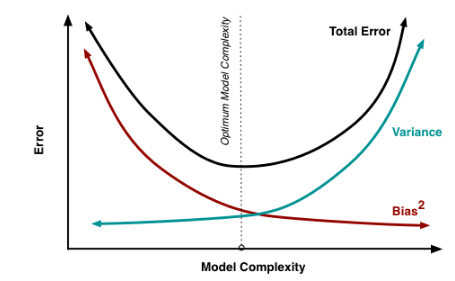
资料来源：https://www.jianshu.com/p/0fe45d4e9542

### Stacking算法

stacking,堆叠法，又称层叠泛化法。它基于一个简单的想法：与其使用一些简单的函数（如硬投票）来聚合集成中所有预测器的预测，我们为什么不训练一个模型来执行这个聚合呢？

不幸的是，Scikit-Learn不直接支持堆叠。可以使用开源的实现方案，例如brew(可从https://github.com/viisar/brew获得）

## 参考文献

[1] Aurelien Geron[著].王静源等[译]机器学习实战-基于Scikit-learn和TensorFlow[M].机械工业出版社(2018)

[2]周志华[著].机器学习[M].清华大学出版社(2016)

[3]Gilles Louppe, Pierre Geurts. Ensembles on Random Patches[C]// European Conference on Machine Learning & Knowledge Discovery in Databases-volume Part I. 2012.

[4]Tin Kam Ho. The random subspace method for constructing decision forests[J]. IEEE Transactions on Pattern Analysis & Machine Intelligence, 20(8):P.832-844.

[5]https://www.jianshu.com/p/0fe45d4e9542

[6]https://www.jianshu.com/p/a62f4dce3ce8